# Práctica 1 - Transformaciones, locomoción y sensado

**Profesor**: Prof. Dr. Ignacio Mas

**Fecha límite de entrega**: 12/09/24, 23:59hs.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## 1. Transformaciones 2D y matrices afines

La pose de un robot en el plano, con respecto a una terna global, se puede escribir como $\mathbf{x}=\begin{bmatrix} x & y & \theta \end{bmatrix}^T$, donde $\begin{bmatrix} x & y \end{bmatrix}^T$ es la posición del robot en el plano y $\theta$ es su orientación. La matriz de transformación homogénea que representa la pose $\mathbf{x}=\begin{bmatrix} x & y & \theta \end{bmatrix}^T$ con respecto al origen de un sistema de coordenadas global está dado por

$$
\begin{align}
\mathbf{T} = \begin{bmatrix}
\mathbf{R}(\theta) & \mathbf{t} \\ 0 & 1
\end{bmatrix} & & \mathrm{con} \hspace{0.5em} \mathbf{R}(\theta) = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix},\; \mathbf{t} = \begin{bmatrix} x \\ y \end{bmatrix}
\end{align}
$$

1. Estando el robot en la pose $\mathbf{x}_1 = \begin{bmatrix} x_1 & y_1 & \theta_1 \end{bmatrix}^T$, detecta un obstáculo $p$ en la posición $\begin{bmatrix} p_x & p_y \end{bmatrix}^T$ con respecto a su propia terna de referencia. Usar la matriz $\mathbf{T}_1$ para calcular las coordenadas de $p$ con respecto a la terna global.

**Respuesta:**

La matriz $\mathbf{T}$ definida anteriormente permite convertir las coordenadas de un objeto con respecto a su terna de referencia a su posición con respecto a la terna global, por lo que sólo hay que multiplicar por esa matriz $\mathbf{T}_1$:

$$
\begin{bmatrix} ^Gp_x \\ ^Gp_y \\ 1 \end{bmatrix} = \mathbf{T}_1 \begin{bmatrix} p_x \\ p_y \\ 1 \end{bmatrix}
$$

2. Dada las coordenadas de un obstáculo en la terna global, ¿cómo pueden calcularse las coordenadas de dicho obstáculo que el robot va a medir en su propia terna?

**Respuesta:**

Las coordenadas en su propia terna se pueden obtener haciendo el proceso inverso y multiplicando por la matriz inversa $\mathbf{T}_1^{-1}$:

$$
\begin{align}
\begin{bmatrix} p_x \\ p_y \\ 1 \end{bmatrix} &= \mathbf{T}_1^{-1} \begin{bmatrix} ^Gp_x \\ ^Gp_y \\ 1 \end{bmatrix} \\
&= \begin{bmatrix} 
\mathbf{R}(\theta_1)^T & -\mathbf{R}(\theta_1)^T\mathbf{t}_1 \\ 0 & 1
\end{bmatrix}
\begin{bmatrix} ^Gp_x \\ ^Gp_y \\ 1 \end{bmatrix}
\end{align}
$$

3. El robot se mueve a una nueva pose $\mathbf{x}_2 = \begin{bmatrix} x_2 & y_2 & \theta_2 \end{bmatrix}^T$ en la terna global. Encontrar la matriz de transformación $\mathbf{T}_{12}$ que representa la nueva pose con respecto a $\mathbf{x}_1$.

**Respuesta:**

Para obtener la matriz $\mathbf{T}_{12}$ que representa la pose $\mathbf{x}_2 = \begin{bmatrix} x_2 & y_2 & \theta_2 \end{bmatrix}^T$ con respecto a un sistema de coordenadas $\mathbf{x}_1 = \begin{bmatrix} x_1 & y_1 & \theta_1 \end{bmatrix}^T$ hacemos el cambio de $\mathbf{x}_2$ a la terna global y después de la terna global a la terna $\mathbf{x}_1$:

$$
\begin{bmatrix} ^2 p_x \\ ^2 p_y \\ 1 \end{bmatrix} = \mathrm{T}_{2}^{-1} \begin{bmatrix} ^G p_x \\ ^G p_y \\ 1 \end{bmatrix} = \mathrm{T}_{2}^{-1} \mathrm{T}_{1} \begin{bmatrix} p_x \\ p_y \\ 1 \end{bmatrix}
$$
Por lo que:

$$
\begin{align}
\mathbf{T}_{12} &= \mathrm{T}_{2}^{-1} \mathrm{T}_{1} \\[.5em]
&= \begin{bmatrix} 
\mathbf{R}(\theta_2)^T & -\mathbf{R}(\theta_2)^T\mathbf{t}_2 \\ 0 & 1
\end{bmatrix}
\begin{bmatrix} \mathbf{R}(\theta_1) & \mathbf{t_1} \\ 0 & 1 \end{bmatrix}
\end{align}
$$

4. Estando ahora el robot en la posición $\mathbf{x}_2$, ¿dónde está el obstáculo $p$ con respecto a la nueva terna local del robot?

**Respuesta:** 

La posición del obstáculo $p$ era $\begin{bmatrix} p_x & p_y \end{bmatrix}^T$ con respecto a la terna de referencia 1. Para obtener la posición en función de la nueva terna 2, utilizo la matriz $\mathbf{T}_{12}$ como se muestra en la respuesta anterior.

## 2. Sensado

Un robot se encuentra en la pose $x = 5\,\mathrm{m}$, $y = -7\,\mathrm{m}$, $\theta = -\pi/4$, según una terna global. Sobre el robot, hay montado un LIDAR en la posición $x = 0.2\,\mathrm{m}$, $y = 0.0\,\mathrm{m}$, $\theta = \pi$ (con respecto a la terna del cuerpo del robot). El sensor produce una lectura que se encuentra en el archivo `laserscan.dat`. La primera medición se toma para el ángulo $\alpha = -\pi/2$ (según la terna del sensor) y la última se toma para el ángulo $\alpha=\pi/2$. El sensor tiene una apertura angular (FOV) de $\pi$ y todas las mediciones intermedias tienen una separación angular constante.

1. Graficar las mediciones en la terna de referencia del LIDAR.

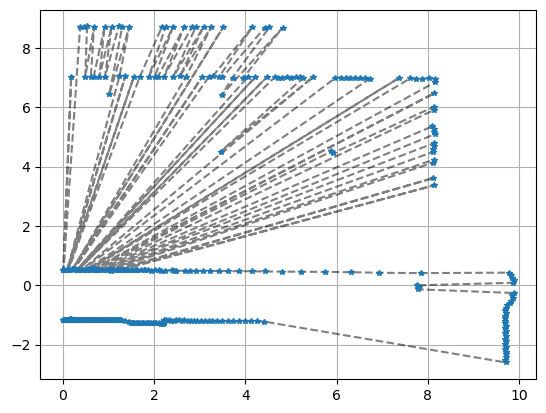

In [2]:
def load_data(filename, theta_start, theta_end):
    data = np.loadtxt(filename, delimiter=" ")
    theta = np.linspace(theta_start, theta_end,len(data))
    df = pd.DataFrame({
        "x": np.cos(theta) * data,
        "y": np.sin(theta) * data,
    })
    return df

def plot(df):
    fig, ax = plt.subplots()
    ax.plot(df["x"], df["y"], "--", alpha=.5, c="k")
    ax.plot(df["x"], df["y"], "*", ms=4)
    ax.grid(True)

theta_start, theta_end = -np.pi/2, np.pi/2
data = load_data("../data/laserscan.dat", theta_start, theta_end)
plot(data)

2. ¿Cómo podrı́an explicarse las mediciones?

**Respuesta:** Asumiendo que el robot hace una medición comenzando con el sensor apuntando hacia abajo ($\alpha=-\pi/2$) y girando hacia arriba ($\alpha=\pi/2$) en sentido antihorario, el gráfico muestra un sensado de una superficie continua con algunas irregularidades y objetos frente a ella. Por otro lado, también se ve que sobre algunas superficies el sensor muestra "saltos" espaciales bastante uniformes, por lo que podría tratarse de una superficie vidirada o agujereada.

3. Usar las transformaciones homogéneas para calcular y graficar:
- La posición del robot en la terna global
- La posición del LIDAR en la terna global
- Las mediciones en la terna global

Para ello, completar primero la función `get_global_pose` del archivo `transformations.py` que recibe la pose del robot y la pose del sensor con respecto al robot, y devuelve la pose del sensor con respecto a la terna global.

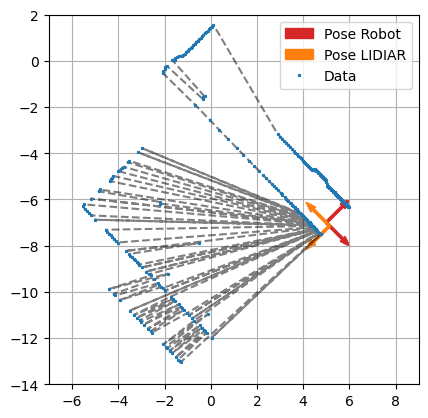

In [3]:
from probabilistic_robotics.transformations import get_global_pose

# Pose del robot respecto a la terna global
pose_robot = np.array([5, -7, -np.pi/4])

# Pose del lidiar respecto a la terna del robot
pose_lid_rob = np.array([[0.2, 0.0, np.pi]])

# Pose del lidiar respecto a la terna global
pose_lid = get_global_pose(pose_lid_rob, pose_robot)[0]

# Mediciones respecto a la terna del lidiar
theta_start, theta_end = -np.pi/2, np.pi/2
data = load_data("../data/laserscan.dat", theta_start, theta_end)
pose_data_lid = np.hstack((data.values, np.zeros((len(data),1)))) # Son puntos sin orientación (theta = 0)
data_G = get_global_pose(pose_data_lid, pose_lid)
data_G = pd.DataFrame(data_G[:,:2], columns=["x","y"])


def plot_pose(pose, ax, **kwargs):
    ax.arrow(pose[0],pose[1],np.cos(pose[2]),np.sin(pose[2]), **kwargs)
    kwargs.pop("label",None)
    ax.arrow(pose[0],pose[1],-np.sin(pose[2]),np.cos(pose[2]), **kwargs)

def plot_poses_and_data(pose_robot, pose_lid, data):
    fig, ax = plt.subplots()
    plot_pose(pose_robot, ax, width=0.1, label="Pose Robot", color="tab:red")
    plot_pose(pose_lid, ax, width=0.1, label="Pose LIDIAR", color="tab:orange")
    ax.plot(data["x"], data["y"], "--", alpha=.5, c="k")
    ax.plot(data["x"], data["y"], "*", ms=2, label="Data")
    ax.grid(True)
    ax.set_xlim(-7,9)
    ax.set_ylim(-14,2)
    ax.set_aspect('equal')
    ax.legend()
    
plot_poses_and_data(pose_robot, pose_lid, data_G)

## 3. Accionamiento diferencial

Completar la función `diffdrive` del archivo `drives/differential.py` que implemente la cinemática directa para un robot de accionamiento diferencial. La función recibe la pose actual y una acción compuesta por la velocidad de las ruedas izquierda y derecha y el tiempo de ejecución, y devuelve la pose resultante del robot.

Comenzando en la pose $x = 0.0\,\mathrm{m}$, $y = 0.0\,\mathrm{m}$, $\theta = \pi/4$, el robot ejecuta la siguiente secuencia de
acciones:

1. $c_1 = (v_l = 0.1m/s, v_r = 0.5m/s, t = 2s)$
2. $c_2 = (v_l = 0.5m/s, v_r = 0.1m/s, t = 2s)$
3. $c_3 = (v_l = 0.2m/s, v_r = 0.2m/s, t = 2s)$
4. $c_4 = (v_l = 1.0m/s, v_r = 0.0m/s, t = 4s)$
5. $c_5 = (v_l = 0.4m/s, v_r = 0.4m/s, t = 2s)$
6. $c_6 = (v_l = 0.2m/s, v_r = -0.2m/s, t = 2s)$
7. $c_7 = (v_l = 0.5m/s, v_r = 0.5m/s, t = 2s)$

Usar la función creada para calcular la pose del robot al ejecutar estas acciones si la distancia $l$
entre ruedas del robot es $0.5m$. Graficar el movimiento resultante.

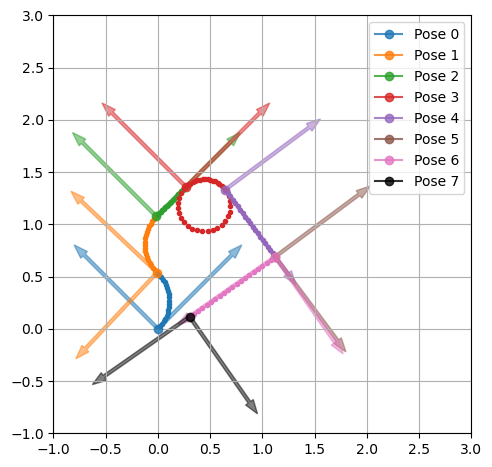

In [4]:
from probabilistic_robotics.drives import diffdrive
import matplotlib.colors as mcolors
from matplotlib.patches import Arc

# Historial de poses:
poses = [
    np.array([0.0, 0.0, np.pi/4]) # pose inicial
]

# distancia entre las ruedas
l = 0.5

# acciones en formato (v_l, v_r, dt):
actions = [ 
    (0.1, 0.5, 2),
    (0.5, 0.1, 2),
    (0.2, 0.2, 2),
    (1.0, 0.0, 4),
    (0.4, 0.4, 2),
    (0.2, -0.2, 2),
    (0.5, 0.5, 2)
]

# Ejecución de las acciones:
fig, ax = plt.subplots(1,1,figsize=(5,5))
for i, (a, c) in enumerate(zip(actions, mcolors.TABLEAU_COLORS)):
    current_pose = poses[-1]
    
    # Plot pose:
    ax.plot(current_pose[0], current_pose[1], marker='o', label=f"Pose {i}", alpha=.8, c=c)
    ax.arrow(current_pose[0], current_pose[1], np.cos(current_pose[2]),np.sin(current_pose[2]), width=.03, alpha=.5, color=c)
    ax.arrow(current_pose[0], current_pose[1], -np.sin(current_pose[2]),np.cos(current_pose[2]), width=.03, alpha=.5, color=c)
    
    # Compute new pose:
    new_pose = diffdrive(current_pose, a, l)
    poses.append(new_pose)

    # Plot intermediate poses:
    n = int(a[2] / 0.1)
    intermediate_action = (a[0], a[1], a[2] / n)
    intermediate_pose = current_pose
    for _ in range(n):
        intermediate_pose = diffdrive(intermediate_pose, intermediate_action, l)
        ax.plot(intermediate_pose[0], intermediate_pose[1], marker='.', c=c)

# Plot final pose:
current_pose = poses[-1]
ax.plot(current_pose[0], current_pose[1], marker='o', label=f"Pose {i+1}", alpha=.8, c="k")
ax.arrow(current_pose[0], current_pose[1], np.cos(current_pose[2]),np.sin(current_pose[2]), width=.03, alpha=.5, color="k")
ax.arrow(current_pose[0], current_pose[1], -np.sin(current_pose[2]),np.cos(current_pose[2]), width=.03, alpha=.5, color="k")

# Plot details:
ax.grid(True)
ax.set_xlim(-1,3)
ax.set_ylim(-1,3)
ax.set_aspect('equal')
ax.legend()
fig.tight_layout()